In [65]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from statsmodels.formula.api import ols
import statsmodels.api as sm
from itertools import product
from sklearn import linear_model
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [66]:
pd.set_option('max_columns', None)
med_df=pd.read_csv('C:/Users/kr529097/Desktop/MSDA/208/task 1/medical_clean.csv')

In [67]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [68]:
# change population density areas from stg to int
# create pop_den dict
dict_pop_den = {'Area': {'Urban':1, 'Suburban':2, 'Rural':3}}
med_df.replace(dict_pop_den, inplace = True)

# rename job
med_df.rename(columns={'Job':'Insured_Job'})

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Insured_Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,2,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,1,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,2,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,2,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,3,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,1,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,1,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,3,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,3,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [69]:
#change gender
gen_dict = {'Gender': {'Male':1, 'Female':2, 'Nonbinary':3}}
med_df.replace(gen_dict, inplace = True)

In [70]:
#change marital status
mar_dict = {'Marital': {'Never Married': 0, 'Married':1, 'Separated':2, 'Divorced':3, 'Widowed':4}}
med_df.replace(mar_dict, inplace=True)

In [71]:
# change complication
comp_dict  = {'Complication_risk': {'High':3, 'Medium':2, 'Low':1}}
med_df.replace(comp_dict, inplace=True)

In [72]:
# rename survey items to accurately reflect questions
med_df.rename(columns = {'Item1':'TimelyAdmin', 'Item2':'TimelyTreat', 'Item3':'TimelyVisit', 'Item4':'Reliability', 'Item5':'Options', 'Item6':'HoursTreat', 'Item7':'StaffAtt', 'Item8':'DocListen'}, inplace=True)


In [73]:
# change all yes/no 
med_df.replace({'Yes':1,
                  'No':0}, inplace=True)

In [74]:
# drop redundant location info 
med_df = med_df.drop(med_df.columns[8:12], axis=1)

In [75]:
# change admission type
admin_dict  = {'Initial_admin': {'Observation Admission':3, 'Elective Admission':2, 'Emergency Admission':1}}
med_df.replace(admin_dict, inplace=True)

In [76]:
# change services
services_dict  = {'Services': {'Blood Work':4, 'Intravenous':3, 'CT Scan':2, 'MRI':1}}
med_df.replace(services_dict, inplace=True)

In [77]:
print(med_df.describe())

         CaseOrder           Zip      Children           Age         Income  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  50159.323900      2.097200     53.511700   40490.495160   
std     2886.89568  27469.588208      2.163659     20.638538   28521.153293   
min        1.00000    610.000000      0.000000     18.000000     154.080000   
25%     2500.75000  27592.000000      0.000000     36.000000   19598.775000   
50%     5000.50000  50207.000000      1.000000     53.000000   33768.420000   
75%     7500.25000  72411.750000      3.000000     71.000000   54296.402500   
max    10000.00000  99929.000000     10.000000     89.000000  207249.100000   

            Marital        Gender       ReAdmis   VitD_levels    Doc_visits  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       2.006000      1.544600      0.366900     17.964262      5.012200   
std        1.417803      0.539296      0.481983    

In [78]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   TimeZone            10000 non-null  object 
 9   Job                 10000 non-null  object 
 10  Children            10000 non-null  int64  
 11  Age                 10000 non-null  int64  
 12  Income              10000 non-null  float64
 13  Marital             10000 non-null  int64  
 14  Gender              10000 non-null  int64  
 15  ReAdmis             10000 non-null  int64  
 16  VitD_

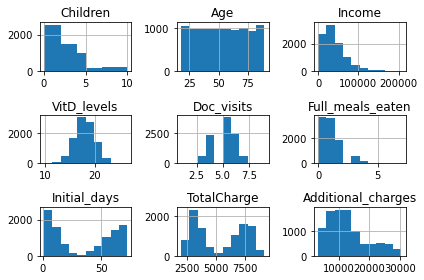

In [79]:
# histograms of continuous variables
med_df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'TotalCharge', 'Additional_charges']].hist()
plt.tight_layout()

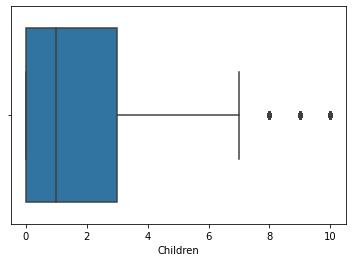

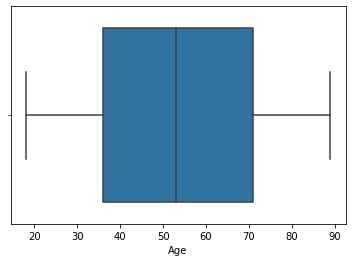

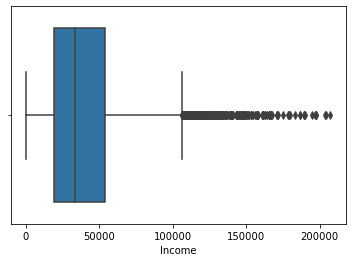

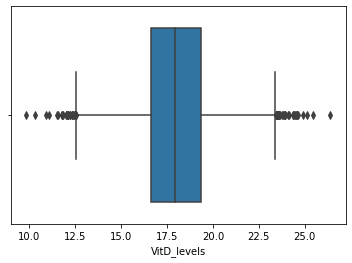

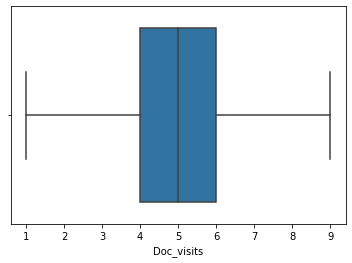

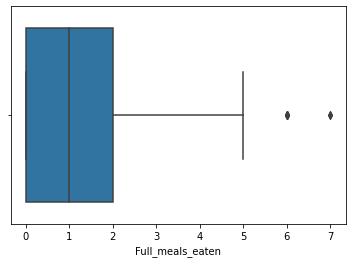

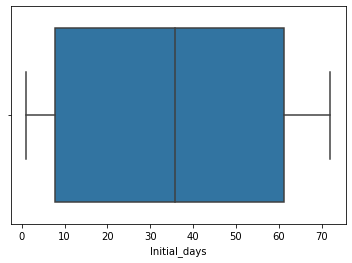

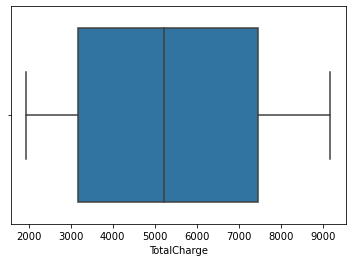

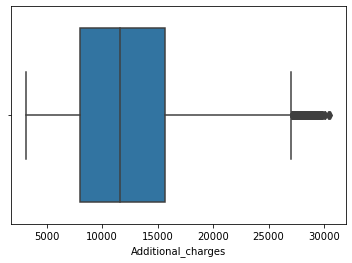

In [80]:
# boxplots for continuous variables
sns.boxplot('Children', data=med_df)
plt.show()
sns.boxplot('Age', data=med_df)
plt.show()
sns.boxplot('Income', data=med_df)
plt.show()
sns.boxplot('VitD_levels', data=med_df)
plt.show()
sns.boxplot('Doc_visits', data=med_df)
plt.show()
sns.boxplot('Full_meals_eaten', data=med_df)
plt.show()
sns.boxplot('Initial_days', data=med_df)
plt.show()
sns.boxplot('TotalCharge', data=med_df)
plt.show()
sns.boxplot('Additional_charges', data=med_df)
plt.show()


In [81]:
med_df['Income']= winsorize(med_df['Income'], limits=[0.05, 0.05])

In [82]:
med_df['Children']= winsorize(med_df['Children'], limits=[0.05, 0.05])

In [83]:
med_df['VitD_levels']= winsorize(med_df['VitD_levels'], limits=[0.05, 0.05])

In [84]:
med_df['Full_meals_eaten']= winsorize(med_df['Full_meals_eaten'], limits=[0.05, 0.05])

In [85]:
med_df['Additional_charges']= winsorize(med_df['Additional_charges'], limits=[0.05, 0.05])

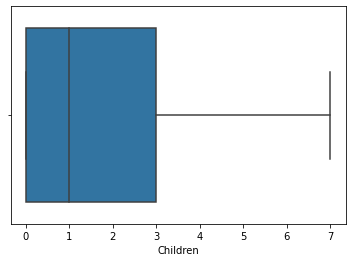

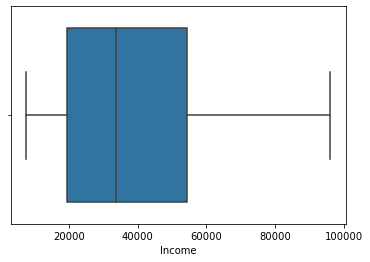

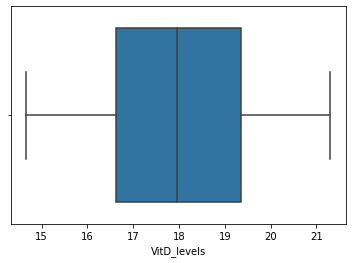

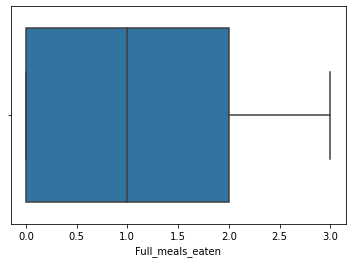

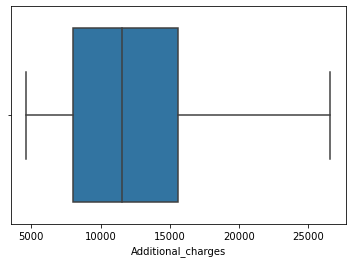

In [86]:
# boxplots for continuous variables after trimming
sns.boxplot('Children', data=med_df)
plt.show()
sns.boxplot('Income', data=med_df)
plt.show()
sns.boxplot('VitD_levels', data=med_df)
plt.show()
sns.boxplot('Full_meals_eaten', data=med_df)
plt.show()
sns.boxplot('Additional_charges', data=med_df)
plt.show()

([<matplotlib.axis.YTick at 0x24a819712e0>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

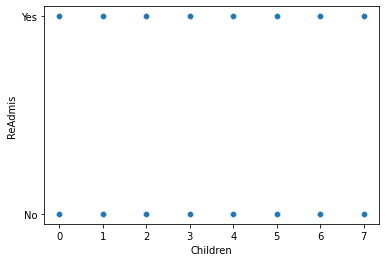

In [87]:
#create scatterplots of all explanatory variables vs response variable
sns.scatterplot(x='Children', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.YTick at 0x24a819929a0>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

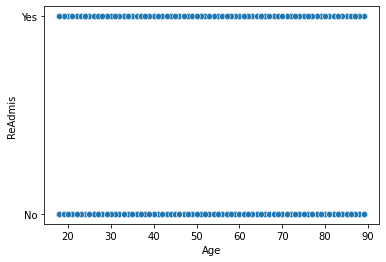

In [88]:
sns.scatterplot(x='Age', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.YTick at 0x24a8298a8e0>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

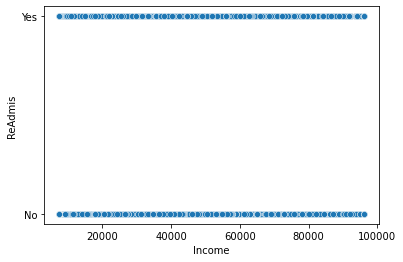

In [89]:
sns.scatterplot(x='Income', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a829e4640>,
 [Text(0, 0, 'Never Married'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

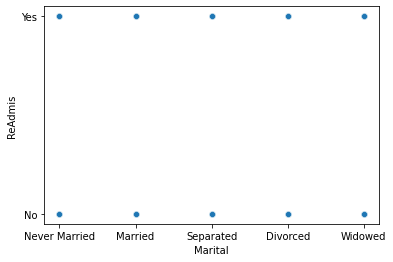

In [90]:
sns.scatterplot(x='Marital', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1,2,3,4], ['Never Married', 'Married', 'Separated', 'Divorced', 'Widowed'])

([<matplotlib.axis.YTick at 0x24a82a56190>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

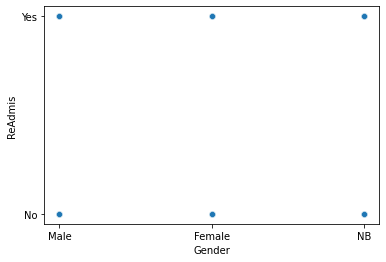

In [91]:
sns.scatterplot(x='Gender', y='ReAdmis', data=med_df)
plt.xticks([1,2,3], ['Male', 'Female', 'NB'])
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.YTick at 0x24a81b14d90>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

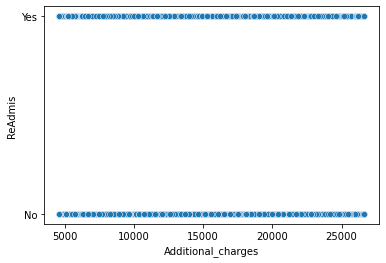

In [92]:
sns.scatterplot(x='Additional_charges', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.YTick at 0x24a819e5820>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

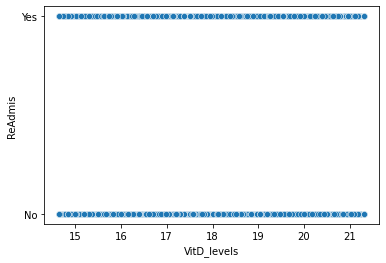

In [93]:
sns.scatterplot(x='VitD_levels', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.YTick at 0x24ae1d1b1c0>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

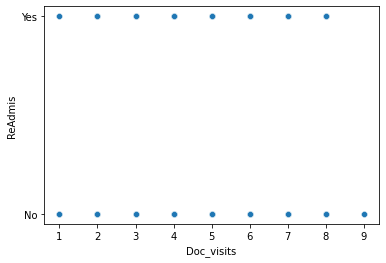

In [94]:
sns.scatterplot(x='Doc_visits', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.YTick at 0x24a81c52bb0>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

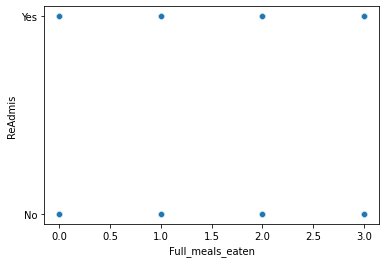

In [95]:
sns.scatterplot(x='Full_meals_eaten', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.YTick at 0x24a81c1eca0>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

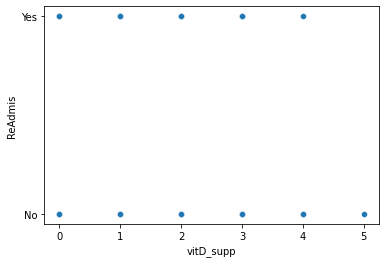

In [96]:
sns.scatterplot(x='vitD_supp', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])


([<matplotlib.axis.YTick at 0x24a819ff430>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

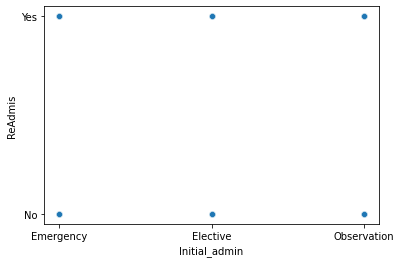

In [97]:
sns.scatterplot(x='Initial_admin', y='ReAdmis', data=med_df)
plt.xticks([1,2,3], ['Emergency', 'Elective', 'Observation'])
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82700e50>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

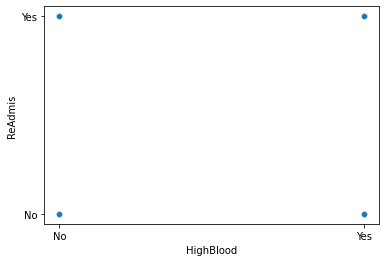

In [98]:
sns.scatterplot(x='HighBlood', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a819287f0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

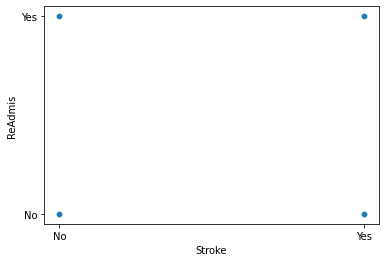

In [99]:
sns.scatterplot(x='Stroke', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a819e4130>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

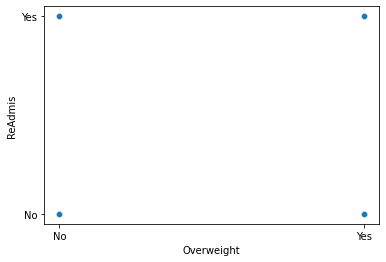

In [100]:
sns.scatterplot(x='Overweight', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82ad1a00>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

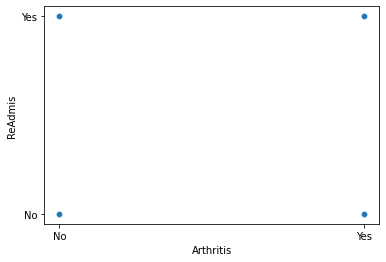

In [101]:
sns.scatterplot(x='Arthritis', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a81bd73a0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

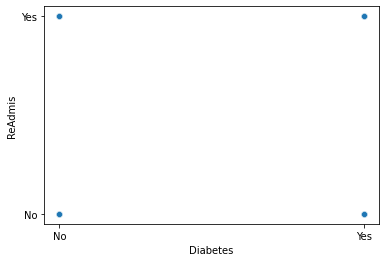

In [102]:
sns.scatterplot(x='Diabetes', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82745c70>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

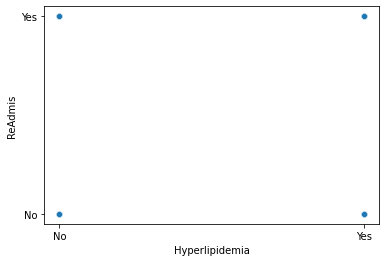

In [103]:
sns.scatterplot(x='Hyperlipidemia', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a8277c580>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

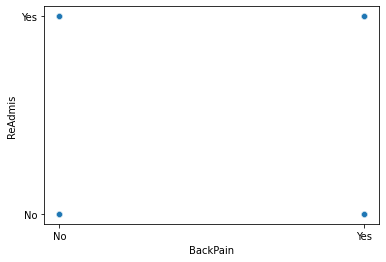

In [104]:
sns.scatterplot(x='BackPain', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82b29f10>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

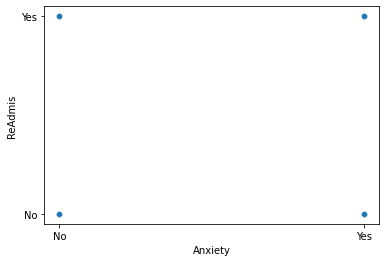

In [105]:
sns.scatterplot(x='Anxiety', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82b8b820>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

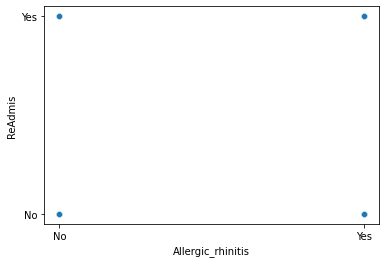

In [106]:
sns.scatterplot(x='Allergic_rhinitis', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82bee100>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

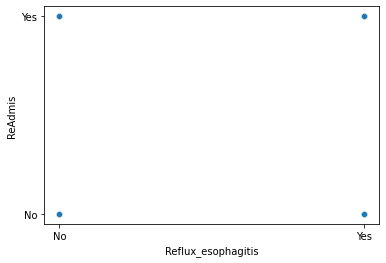

In [107]:
sns.scatterplot(x='Reflux_esophagitis', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82c49ac0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

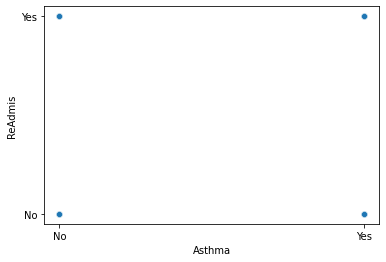

In [108]:
sns.scatterplot(x='Asthma', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82ca9400>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

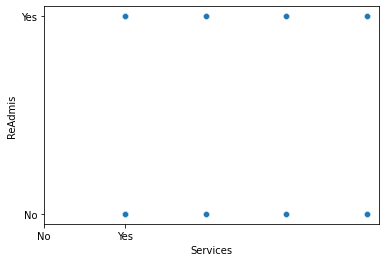

In [109]:
sns.scatterplot(x='Services', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a827c5280>,
 [Text(1, 0, 'Low'), Text(2, 0, 'Medium'), Text(3, 0, 'High')])

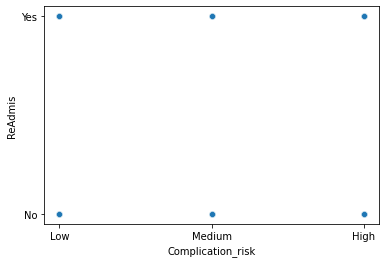

In [110]:
sns.scatterplot(x='Complication_risk', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])

([<matplotlib.axis.YTick at 0x24a82d6d670>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

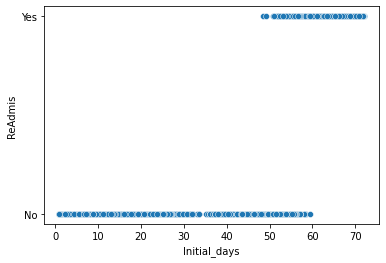

In [111]:
sns.scatterplot(x='Initial_days', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])


([<matplotlib.axis.YTick at 0x24a82dd6100>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

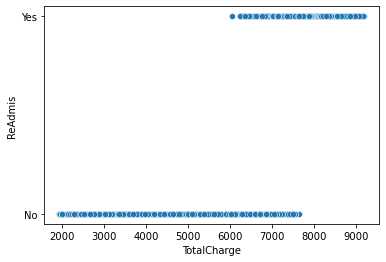

In [112]:
sns.scatterplot(x='TotalCharge', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x24a82e34df0>,
 [Text(1, 0, 'MRI'),
  Text(2, 0, 'CT Scan'),
  Text(3, 0, 'Blood Work'),
  Text(4, 0, 'Intravenous')])

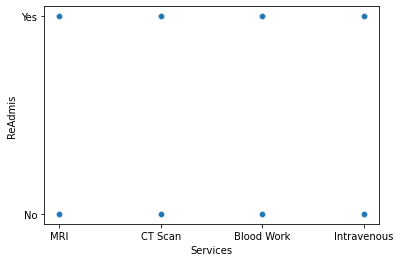

In [113]:
sns.scatterplot(x='Services', y='ReAdmis', data=med_df)
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([1,2,3,4], ['MRI', 'CT Scan', 'Blood Work', 'Intravenous'])

In [115]:
#extract cleaned dataset
med_df.to_csv(r'C:/Users/kr529097/Desktop/MSDA/med_prep208_2.csv')

In [116]:
#extract prepared data set
med_df.to_csv('med_prep.csv')

In [117]:
med_prep=pd.read_csv('med_prep.csv')
med_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   TimeZone            10000 non-null  object 
 10  Job                 10000 non-null  object 
 11  Children            10000 non-null  int64  
 12  Age                 10000 non-null  int64  
 13  Income              10000 non-null  float64
 14  Marital             10000 non-null  int64  
 15  Gender              10000 non-null  int64  
 16  ReAdm

In [118]:
#create dataframe with independent variables
X= med_prep[['Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [119]:
#create dataframe for dependent variable
y = med_prep[['ReAdmis']]

In [120]:
logreg = linear_model.LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [121]:
print(logreg.coef_)

[[-2.49179892e-02 -2.53953305e-02 -8.61618031e-06 -8.63666397e-02
  -7.88065632e-02 -6.93693548e-01 -2.23294148e-01 -3.61489931e-02
  -2.28305572e-02 -5.62596397e-03 -2.45031181e-01 -2.11362433e-02
  -1.97726470e-03 -4.29263257e-03 -3.59393133e-02 -2.09355077e-02
  -7.43421084e-03  3.86915363e-03 -6.50091152e-03 -1.09678634e-02
  -1.88795793e-02 -1.58303935e-02 -2.48349782e-02 -1.86865339e-01
   5.30493233e-01 -1.77060621e-03  5.94415888e-05]]


In [122]:
print(logreg.intercept_)

[-0.05246989]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7, stratify = y)

In [124]:
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

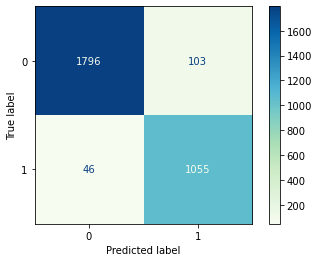

In [125]:
c_matrix=metrics.plot_confusion_matrix(logreg, X_test, y_test, cmap='GnBu')

In [126]:
# determine accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9503333333333334


In [80]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score


In [127]:
mdl=mdl_med.drop('ReAdmis', axis=1)
print(mdl)

      Children  Age  Marital  VitD_levels    Income  Doc_visits  Initial_days  \
0            1   53        3    19.141466  86575.93           6     10.585770   
1            3   51        1    18.940352  46805.99           4     15.129562   
2            3   53        4    18.057507  14370.14           4      4.772177   
3            0   78        1    16.576858  39741.49           4      1.714879   
4            1   22        4    17.439069   7520.47           5      1.254807   
...        ...  ...      ...          ...       ...         ...           ...   
9995         2   25        4    16.980860  45967.61           4     51.561220   
9996         4   87        4    18.177020  14983.02           5     68.668240   
9997         3   45        2    17.129070  65917.81           4     70.154180   
9998         3   43        3    19.910430  29702.32           5     63.356900   
9999         7   70        2    18.388620  62682.63           5     70.850590   

      TotalCharge  Addition

In [128]:
med_prep.var()

Unnamed: 0            8.334167e+06
CaseOrder             8.334167e+06
Zip                   7.545783e+08
Children              3.834381e+00
Age                   4.259493e+02
Income                6.168312e+08
Marital               2.010165e+00
Gender                2.908399e-01
ReAdmis               2.323076e-01
VitD_levels           3.397259e+00
Doc_visits            1.093561e+00
Full_meals_eaten      8.822546e-01
vitD_supp             3.950183e-01
Soft_drink            1.912129e-01
Initial_admin         6.808143e-01
HighBlood             2.417432e-01
Stroke                1.595955e-01
Complication_risk     5.331504e-01
Overweight            2.061723e-01
Arthritis             2.296882e-01
Diabetes              1.988534e-01
Hyperlipidemia        2.235185e-01
BackPain              2.421743e-01
Anxiety               2.181596e-01
Allergic_rhinitis     2.388091e-01
Reflux_esophagitis    2.425420e-01
Asthma                2.056261e-01
Services              6.934853e-01
Initial_days        

In [131]:
mdl_med=med_prep[['Children', 'Age', 'Marital', 'VitD_levels', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 5)
rfe = rfe.fit(mdl, mdl_med.ReAdmis)

In [133]:
# summarize all features
for i in range(mdl.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 5.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected False, Rank: 4.000


In [134]:
# run model with reduced explanatory variables
X = med_prep[['Children', 'Marital', 'VitD_levels', 'Doc_visits', 'TotalCharge', 'Initial_days']]
y = med_prep[['ReAdmis']]
logreg = linear_model.LogisticRegression()
logreg.fit(X,y)
print(logreg.coef_)
print(logreg.intercept_)

[[-0.01042322 -0.05467869 -0.62677137 -0.59216346 -0.0017209   0.50636632]]
[-0.78889917]


In [135]:
new_data=med_prep[['Children', 'Marital', 'VitD_levels', 'Doc_visits', 'TotalCharge', 'Initial_days']]

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7, stratify = y)

In [138]:
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

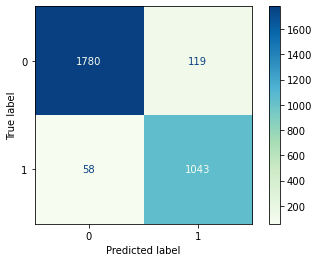

In [139]:
from sklearn import metrics
c_matrix=metrics.plot_confusion_matrix(logreg, X_test, y_test, cmap='GnBu')

In [140]:
# determine accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.941
